# Individual Project

Author: Hairuilong Zhang     
Date: 2020.10.21

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# print current working directory
import os
os.getcwd()

'/media/sf_shared/dse511_individual_project'

In [3]:
mpl.style.use('fivethirtyeight')

In [4]:
# connect to the database
conn = sqlite3.connect('financial.db')
c = conn.cursor()

## Find all the tables in the database and their relationships


In [5]:
# print and store all table names in database
tables = []
for row in c.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row[0])
    tables.append(row[0])

account
card
client
disp
district
loan
order
trans


The database is about the clients and their bank acounts. It contains the following relational tables. **Figure 1** shows the relationships between these tables.
<figure>
    <img src="http://research.ganse.org/resources/structure.png" width=800 height=600>
    <figcaption>
        <center><b>Figure 1.</b> Data Frame Relationships [1]</center>
    </figcaption>
</figure>

## Load data into pandas DataFrame

In [6]:
# extract data to data.frame
# order needs single quote 'order'
order = pd.read_sql_query("SELECT * FROM 'order';", conn)
# read other tables
account = pd.read_sql_query("SELECT * FROM account;", conn)
card = pd.read_sql_query("SELECT * FROM card;", conn)
client = pd.read_sql_query("SELECT * FROM client;", conn)
disp = pd.read_sql_query("SELECT * FROM disp;", conn)
district = pd.read_sql_query("SELECT * FROM district;", conn)
loan = pd.read_sql_query("SELECT * FROM loan;", conn)
trans = pd.read_sql_query("SELECT * FROM trans;", conn, parse_dates=['date'])
# store in the list
db = [account, card, client, disp, district, loan, order, trans]


## Print basic information of each table

In [7]:
# check the basic information of each table
for i in range(len(db)):
    print(tables[i])
    print(db[i].info())
    print('\n')

account
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   object
dtypes: int64(2), object(2)
memory usage: 140.8+ KB
None


card
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  892 non-null    int64 
 1   disp_id  892 non-null    int64 
 2   type     892 non-null    object
 3   issued   892 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB
None


client
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----

From the basic information, we find that 'trans' is the largest table which stores transactions on an account. It used about 80.6 MB of memory, which is acceptable and it's safe and convenient to load all tables into our RAM.

## Show example rows of each table

In [8]:
# show head of each table (first 5 rows)
for i in range(len(db)):
    print(tables[i]+':')
    display(db[i].head())

account:


,account_id,district_id,frequency,date
0,1,18,POPLATEK MESICNE,1995-03-24
1,2,1,POPLATEK MESICNE,1993-02-26
2,3,5,POPLATEK MESICNE,1997-07-07
3,4,12,POPLATEK MESICNE,1996-02-21
4,5,15,POPLATEK MESICNE,1997-05-30


card:


,card_id,disp_id,type,issued
0,1,9,gold,1998-10-16
1,2,19,classic,1998-03-13
2,3,41,gold,1995-09-03
3,4,42,classic,1998-11-26
4,5,51,junior,1995-04-24


client:


,client_id,gender,birth_date,district_id
0,1,F,1970-12-13,18
1,2,M,1945-02-04,1
2,3,F,1940-10-09,1
3,4,M,1956-12-01,5
4,5,F,1960-07-03,5


disp:


,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


district:


,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.6,1.85,132,2159.0,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.9,2.21,111,2824.0,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.6,5.05,109,5244.0,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.8,4.43,118,2616.0,3040


loan:


,loan_id,account_id,date,amount,duration,payments,status
0,4959,2,1994-01-05,80952,24,3373,A
1,4961,19,1996-04-29,30276,12,2523,B
2,4962,25,1997-12-08,30276,12,2523,A
3,4967,37,1998-10-14,318480,60,5308,D
4,4968,38,1998-04-19,110736,48,2307,C


order:


,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


trans:


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,1995-03-24,PRIJEM,VKLAD,1000,1000,None,None,NaN
1,5,1,1995-04-13,PRIJEM,PREVOD Z UCTU,3679,4679,None,AB,41403269.0
2,6,1,1995-05-13,PRIJEM,PREVOD Z UCTU,3679,20977,None,AB,41403269.0
3,7,1,1995-06-13,PRIJEM,PREVOD Z UCTU,3679,26835,None,AB,41403269.0
4,8,1,1995-07-13,PRIJEM,PREVOD Z UCTU,3679,30415,None,AB,41403269.0


## Basic exploratory analysis

### How many OWNER v.s. DISPONENT?

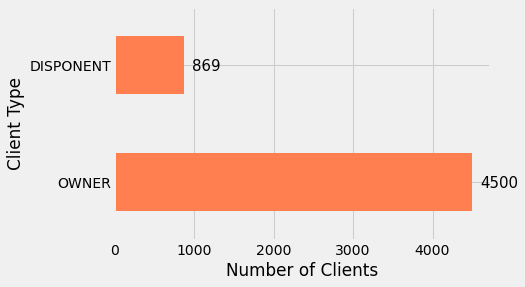

In [9]:
ax = disp['type'].value_counts().plot(kind='barh',color='coral')
_ = ax.set_xlabel("Number of Clients")
_ = ax.set_ylabel("Client Type")

# add chart annotations
for i in ax.patches:
    ax.text(i.get_width()+100, i.get_y()+.2, str(i.get_width()),fontsize=15)

### Take a look at the loan conditions of the bank

In [10]:
# merge account characteristics "frequency" to loan using 'account_id'
df_loans = pd.merge(left=loan, right=account.iloc[:,[0,2]], how='left',on='account_id')
df_loans.head()

,loan_id,account_id,date,amount,duration,payments,status,frequency
0,4959,2,1994-01-05,80952,24,3373,A,POPLATEK MESICNE
1,4961,19,1996-04-29,30276,12,2523,B,POPLATEK MESICNE
2,4962,25,1997-12-08,30276,12,2523,A,POPLATEK MESICNE
3,4967,37,1998-10-14,318480,60,5308,D,POPLATEK MESICNE
4,4968,38,1998-04-19,110736,48,2307,C,POPLATEK TYDNE


In [11]:
# based on meaning of 'status', creating a new variable problem = 1 if status = B, or D, 0 otherwise
df_loans['problem'] = np.where(df_loans['status'].isin(['B','D']), 1, 0)
# consider problem as our target variable, indicating the loan conditon
df_loans

,loan_id,account_id,date,amount,duration,payments,status,frequency,problem
0,4959,2,1994-01-05,80952,24,3373,A,POPLATEK MESICNE,0
1,4961,19,1996-04-29,30276,12,2523,B,POPLATEK MESICNE,1
2,4962,25,1997-12-08,30276,12,2523,A,POPLATEK MESICNE,0
3,4967,37,1998-10-14,318480,60,5308,D,POPLATEK MESICNE,1
4,4968,38,1998-04-19,110736,48,2307,C,POPLATEK TYDNE,0
...,...,...,...,...,...,...,...,...,...
677,7294,11327,1998-09-27,39168,24,1632,C,POPLATEK MESICNE,0
678,7295,11328,1998-07-18,280440,60,4674,C,POPLATEK MESICNE,0
679,7304,11349,1995-10-29,419880,60,6998,C,POPLATEK TYDNE,0
680,7305,11359,1996-08-06,54024,12,4502,A,POPLATEK MESICNE,0


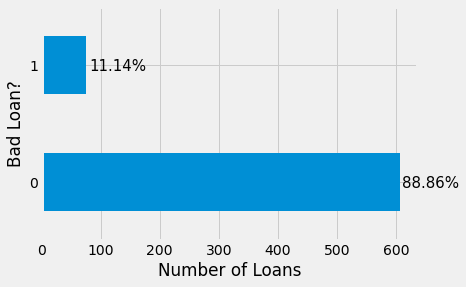

In [12]:
ax1 = df_loans['problem'].value_counts().plot(kind='barh')
_ = ax1.set_xlabel("Number of Loans")
_ = ax1.set_ylabel("Bad Loan?")

# add chart annotations
for i in ax1.patches:
    ax1.text(i.get_width()+5, i.get_y()+.2, str(round((i.get_width()/682)*100,2))+'%',fontsize=15)

There are about 11% bad loans, and we also want to examine the relationship between other explanatory variables and problem.

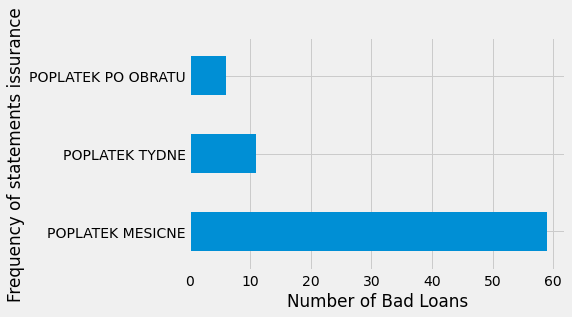

In [13]:
# frequency
ax2 = df_loans[df_loans.problem==1]['frequency'].value_counts().plot(kind='barh')
_ = ax2.set_xlabel("Number of Bad Loans")
_ = ax2.set_ylabel("Frequency of statements issurance")

It can be seen that **monthly issurance** caused more problems.

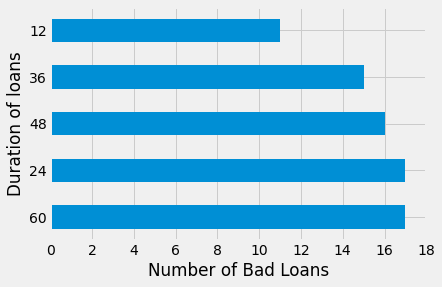

In [14]:
# loan duration
ax3 = df_loans[df_loans.problem==1]['duration'].value_counts().plot(kind='barh')
_ = ax3.set_xlabel("Number of Bad Loans")
_ = ax3.set_ylabel("Duration of loans")
_ = ax3.set_xticks(np.arange(0,20,2))

Loans of **12 month** resulted in slightly less problems than longer loans.

### Dive a little bit into transactions data

Here, I basically want to track the transaction history for accounts. Notice that we have 4500 accounts in total.

In [15]:
# check number of accounts
account_ids = trans['account_id'].unique()
len(account_ids)

4500

What will the distribution of balance look like? Is there a negative balance?

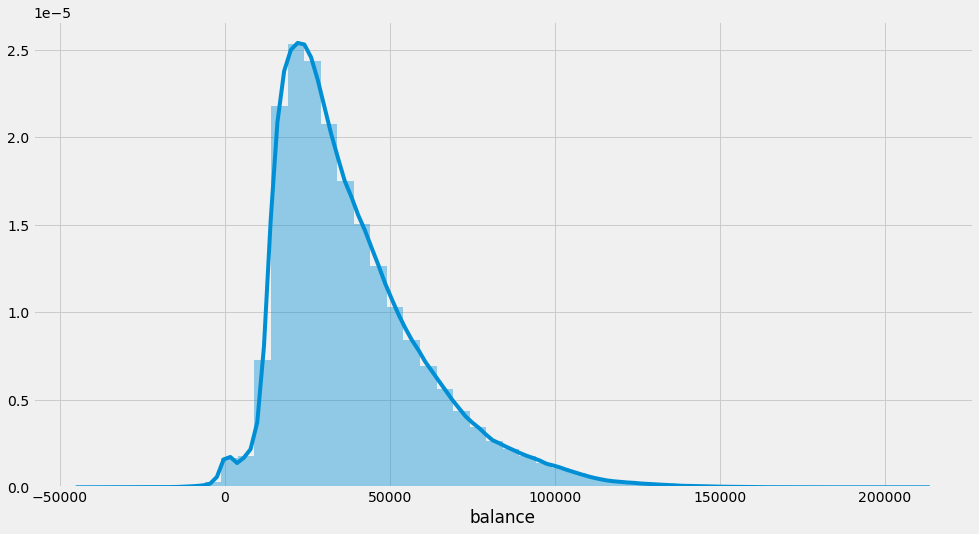

In [16]:
# plot the distribution of all the balance
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,8))
_ = sns.distplot(trans['balance'], ax=ax)

Balance kind of follows a log-normal distribution which is right-skewed. It make sense to some extent because people are always difficult to save money... And there indeed exists some account with a negative balance.

Here, I will pick first five account id to track the history for time reasons.

In [17]:
acc_trans = {} # use dict to store accoun id -> transaction dataframe
for acc_id in account_ids[:5]:
    acc_trans[acc_id] = trans[trans['account_id']==acc_id]

# remove transaction data from RAM for efficiency
del trans

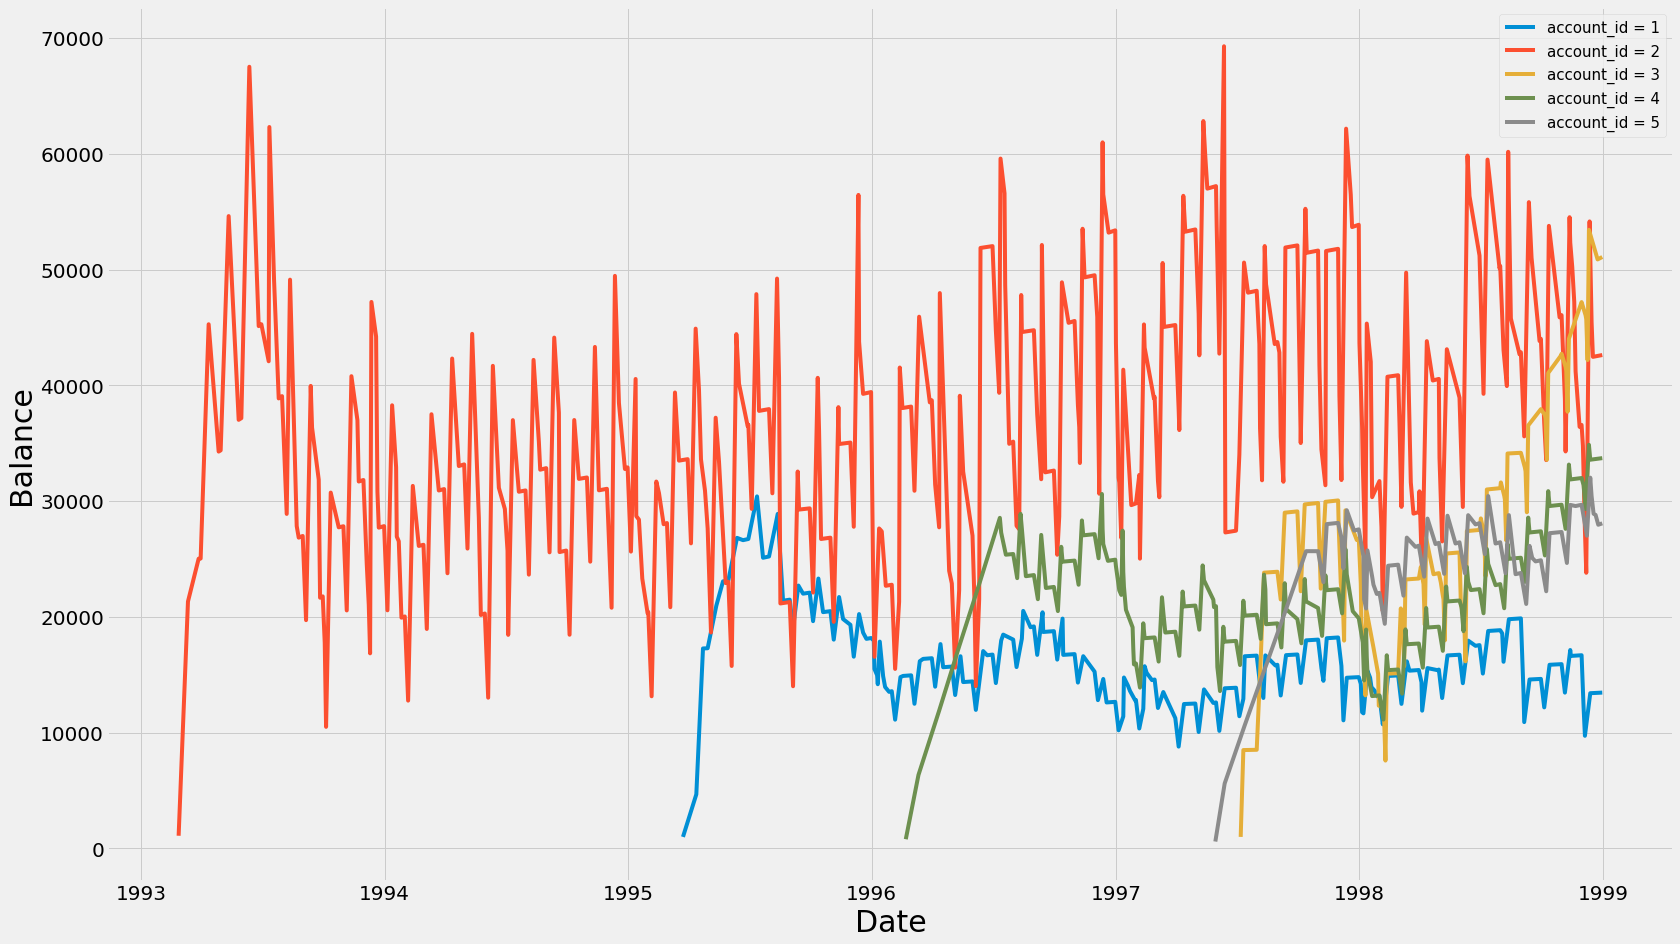

In [18]:
fig, ax = plt.subplots(figsize=(25,15))

for acc_id in account_ids[:5]:
    df_acc_b = acc_trans[acc_id]
    acc_balance = df_acc_b.groupby('date')['balance'].mean()
    ax.plot(acc_balance,label=f'account_id = {acc_id}')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=30)
plt.ylabel('Balance',fontsize=30)
plt.legend(fontsize=15)
plt.show()

## Conclusion

This exploratory analysis basically examines loans and transactions data. Some relational analysis between account characteristics and loan condition was conducted using visualizations like bar chart. Data aggregating and merging techniques are leveraged as well. As for transactions data, a simple distribution plot for account balance was generated and the account balance history for first 5 accounts were plotted in the same figure. It is apparent to see the account trace alongside the time axis. Future work might involve deploying some machine learning methods to this database to classify and categorize the clients. 

## References
1. research.ganse.org/datasci/loanpredict
2. sorry.vse.cz/~berka/challenge/pkdd1999/berka.htm